#Portfolio Management

##Investment Objective

## Stock Selection Implementation

###Imports

In [1]:
!pip install yfinance
!pip install ta
!pip install gurobipy==9.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 844 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29104 sha256=b76114809ecb380293799939e8b98b575e95b441a3bec48f249b366b1a146ef8
  Stored in directory: /root/.cache/pip/wheels/31/31/f1/f2ff471bbc5b84a4b973698ceecdd453ae043971791adc3431
Successfully built ta
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.5 MB 5.0 MB/s 


In [2]:
from ta.utils import dropna
from ta.volatility import BollingerBands
from ta.trend import ADXIndicator
from ta.volatility import AverageTrueRange
from ta.trend import SMAIndicator
from ta.momentum import RSIIndicator
from ta.volume import VolumeWeightedAveragePrice
from ta.volume import ChaikinMoneyFlowIndicator
from ta.volume import chaikin_money_flow
from ta.trend import EMAIndicator
import matplotlib.pyplot as plt
import yfinance as yf
import math
import pandas as pd
import numpy as np
import os

###Global constants

In [18]:
all_stocks = ["502.SI", "BQC.SI", "BTJ.SI", "533.SI", "L5I.SI", "541.SI", "QZG.SI", "A75.SI", "5FW.SI", "AYV.SI", "43F.SI", "A31.SI", "BLZ.SI", "5TY.SI", "43Q.SI", "5EF.SI", "XVG.SI", "AWG.SI", "AWX.SI", "L38.SI", "1A4.SI", "O5RU.SI", "BVP.SI", "40F.SI", "MIJ.SI", "VVL.SI", "40V.SI", "A34.SI", "S9B.SI", "49B.SI", "AOF.SI", "HKB.SI", "Y35.SI", "BTX.SI", "A52.SI", "5AL.SI", "1D4.SI", "5AU.SI", "5RA.SI", "CLN.SI", "XZL.SI", "YYB.SI", "A17U.SI", "CY6U.SI", "HMN.SI", "A55.SI", "5RE.SI", "505.SI", "1J3.SI", "585.SI", "S7OU.SI", "5WV.SI", "5CR.SI", "A04.SI", "1F3.SI", "A30.SI", "42S.SI", "575.SI", "5UL.SI", "1AZ.SI", "5GJ.SI", "U09.SI", "A05.SI", "42U.SI", "BBW.SI", "8AZ.SI", "CJN.SI", "BTP.SI", "B26.SI", "B58.SI", "KJ5.SI", "BEZ.SI", "VFP.SI", "BQN.SI", "BMGU.SI", "8YY.SI", "41H.SI", "A33.SI", "5VI.SI", "B28.SI", "F9D.SI", "AVM.SI", "BEC.SI", "B69.SI", "AWC.SI", "B61.SI", "P8Z.SI", "BTE.SI", "594.SI", "1D5.SI", "9CI.SI", "AU8U.SI", "C38U.SI", "AWV.SI", "C04.SI", "J85.SI", "BXE.SI", "OU8.SI", "5EB.SI", "C13.SI", "573.SI", "5QT.SI", "5NV.SI", "5TW.SI", "C05.SI", "G92.SI", "5OU.SI", "RS1.SI", "U9E.SI", "B0Z.SI", "BEH.SI", "BHD.SI", "42W.SI", "BCD.SI", "P74.SI", "GU5.SI", "QES.SI", "C29.SI", "42E.SI", "C33.SI", "C09.SI", "P9D.SI", "1H3.SI", "5TP.SI", "567.SI", "N0Z.SI", "C52.SI", "P8A.SI", "C41.SI", "F83.SI", "B9S.SI", "CIN.SI", "C76.SI", "TCU.SI", "CWBU.SI", "C06.SI", "544.SI", "D01.SI", "DHLU.SI", "BLR.SI", "CEDU.SI", "BKW.SI", "D05.SI", "BTF.SI", "D03.SI", "P34.SI", "DCRU.SI", "BAI.SI", "532.SI", "GRQ.SI", "MT1.SI", "5SO.SI", "NO4.SI", "LIW.SI", "BWCU.SI", "EHG.SI", "5CT.SI", "5HG.SI", "42Z.SI", "MXNU.SI", "BIX.SI", "R14.SI", "S44.SI", "BQD.SI", "L23.SI", "5RC.SI", "J91U.SI", "1C0.SI", "5G1.SI", "5DN.SI", "F99.SI", "BFT.SI", "5FL.SI", "5TJ.SI", "Q5T.SI", "O10.SI", "BDU.SI", "5F4.SI", "AW9U.SI", "EB5.SI", "ADN.SI", "F10.SI", "F03.SI", "8A1.SI", "OAJ.SI", "J69U.SI", "ACV.SI", "BUOU.SI", "TQ5.SI", "E28.SI", "D8DU.SI", "F13.SI", "508.SI", "BTY.SI", "AWK.SI", "QS9.SI", "G41.SI", "5IG.SI", "41T.SI", "5VP.SI", "G13.SI", "RE4.SI", "XJB.SI", "595.SI", "586.SI", "B73.SI", "BLW.SI", "AYN.SI", "E5H.SI", "AUE.SI", "5PC.SI", "G20.SI", "G50.SI", "JLB.SI", "G07.SI", "Y06.SI", "BLU.SI", "43A.SI", "BDX.SI", "41F.SI", "G11.SI", "F17.SI", "AWS.SI", "5VS.SI", "BLH.SI", "5VJ.SI", "DM0.SI", "PH0.SI", "H02.SI", "1B1.SI", "40B.SI", "5NG.SI", "5OR.SI", "5DP.SI", "5PD.SI", "BTG.SI", "5GZ.SI", "5JK.SI", "510.SI", "5PO.SI", "AVX.SI", "H13.SI", "J2T.SI", "H20.SI", "H30.SI", "CTO.SI", "H22.SI", "S41.SI", "H78.SI", "BBP.SI", "5EV.SI", "H18.SI", "H12.SI", "BLS.SI", "NS8U.SI", "H15.SI", "CHZ.SI", "504.SI", "41B.SI", "600.SI", "1J5.SI", "5I4.SI", "AIY.SI", "I49.SI", "Q0F.SI", "5HT.SI", "RDR.SI", "5JS.SI", "BOU.SI", "M14.SI", "5GI.SI", "KUO.SI", "I06.SI", "AZA.SI", "42N.SI", "UD1U.SI", "I07.SI", "40T.SI", "I15.SI", "5WF.SI", "42C.SI", "J17.SI", "J03.SI", "5OI.SI", "UD2.SI", "C07.SI", "5PF.SI", "FQ7.SI", "1J7.SI", "BEW.SI", "1J4.SI", "EG0.SI", "C8R.SI", "J36.SI", "E9L.SI", "NHD.SI", "42R.SI", "K29.SI", "1A0.SI", "BNE.SI", "5TT.SI", "A7RU.SI", "CMOU.SI", "BN4.SI", "AJBU.SI", "K71U.SI", "K03.SI", "5G2.SI", "1D0.SI", "554.SI", "5MZ.SI", "5TI.SI", "BJZ.SI", "K75.SI", "5HV.SI", "5I1.SI", "5VC.SI", "5OC.SI", "578.SI", "ER0.SI", "EB7.SI", "XCF.SI", "LS9.SI", "JYEU.SI", "Q0X.SI", "41O.SI", "BEI.SI", "L03.SI", "1D3.SI", "BAZ.SI", "D5IU.SI", "PRH.SI", "5IE.SI", "F1E.SI", "L19.SI", "5UA.SI", "L09.SI", "BKK.SI", "1H8.SI", "M04.SI", "L02.SI", "BTOU.SI", "N2IU.SI", "ME8U.SI", "M44U.SI", "5LY.SI", "5OX.SI", "M15.SI", "5UF.SI", "Y3D.SI", "5TN.SI", "OTX.SI", "546.SI", "5DS.SI", "SJY.SI", "1H4.SI", "5NF.SI", "5RF.SI", "DU4.SI", "5DX.SI", "V3M.SI", "M01.SI", "MV4.SI", "M11.SI", "5DD.SI", "5EN.SI", "CNE.SI", "M03.SI", "1B0.SI", "5WJ.SI", "1V3.SI", "5WE.SI", "40U.SI", "NPW.SI", "5QR.SI", "M05.SI", "AWZ.SI", "MF6.SI", "F86.SI", "N4E.SI", "G0I.SI", "MZH.SI", "5IF.SI", "42D.SI", "N01.SI", "5QY.SI", "CJLU.SI", "BMT.SI", "N08.SI", "5FX.SI", "5GF.SI", "N32.SI", "1G6.SI", "543.SI", "MR7.SI", "N02.SI", "AZT.SI", "O39.SI", "1B6.SI", "579.SI", "584.SI", "KUX.SI", "S3N.SI", "5CF.SI", "5ML.SI", "1H2.SI", "5SY.SI", "O08.SI", "OTS.SI", "LJ3.SI", "TS0U.SI", "5WA.SI", "AJ2.SI", "RQ1.SI", "5UX.SI", "TVV.SI", "5AI.SI", "P11.SI", "P15.SI", "T8V.SI", "1C5.SI", "5EW.SI", "P36.SI", "P52.SI", "O9E.SI", "C2PU.SI", "596.SI", "IX2.SI", "BTM.SI", "BFK.SI", "YYN.SI", "BDA.SI", "5BI.SI", "5AE.SI", "BCY.SI", "OXMU.SI", "BVQ.SI", "583.SI", "OYY.SI", "K6S.SI", "QC7.SI", "Q01.SI", "BCV.SI", "NR7.SI", "LUY.SI", "BSL.SI", "1G1.SI", "NEX.SI", "5EC.SI", "UV1.SI", "I11.SI", "QSD.SI", "RCU.SI", "5WH.SI", "T13.SI", "5G4.SI", "AP4.SI", "M1GU.SI", "5DO.SI", "E6R.SI", "S56.SI", "Y8E.SI", "580.SI", "BRD.SI", "U77.SI", "CRPU.SI", "S58.SI", "5PL.SI", "S61.SI", "528.SI", "43B.SI", "U96.SI", "S51.SI", "5BS.SI", "S69.SI", "IW5.SI", "S68.SI", "SES.SI", "AWM.SI", "S07.SI", "A78.SI", "OV8.SI", "BKV.SI", "1F0.SI", "566.SI", "C6L.SI", "S59.SI", "BHK.SI", "STP.SI", "5CP.SI", "URR.SI", "BKA.SI", "A26.SI", "5UN.SI", "S35.SI", "FRQ.SI", "5WG.SI", "U06.SI", "5IC.SI", "5OT.SI", "S08.SI", "S19.SI", "Z74.SI", "Z77.SI", "5HH.SI", "T4B.SI", "5EK.SI", "C9Q.SI", "5LE.SI", "1J0.SI", "Y45.SI", "S7P.SI", "5MD.SI", "5KI.SI", "BQP.SI", "QNS.SI", "AWE.SI", "40E.SI", "SK6U.SI", "564.SI", "S23.SI", "NC2.SI", "STG.SI", "S63.SI", "DRX.SI", "H07.SI", "S29.SI", "P40U.SI", "CC3.SI", "S85.SI", "S20.SI", "AAJ.SI", "5GD.SI", "S71.SI", "581.SI", "BKZ.SI", "T82U.SI", "BHU.SI", "BGK.SI", "BEV.SI", "ADP.SI", "5UO.SI", "PA3.SI", "500.SI", "42L.SI", "5G3.SI", "T12.SI", "VI2.SI", "T15.SI", "M1Z.SI", "5OQ.SI", "T41.SI", "Y92.SI", "AWI.SI", "E27.SI", "AGS.SI", "A50.SI", "T14.SI", "T55.SI", "BFI.SI", "BQM.SI", "BVA.SI", "42F.SI", "570.SI", "BCZ.SI", "5AB.SI", "42T.SI", "CYW.SI", "5G9.SI", "RC5.SI", "KUH.SI", "T09.SI", "T24.SI", "540.SI", "BFU.SI", "8K7.SI", "558.SI", "CHJ.SI", "1F2.SI", "BLA.SI", "AZR.SI", "1D1.SI", "EH5.SI", "U11.SI", "U10.SI", "U13.SI", "U14.SI", "BRS.SI", "ODBU.SI", "V2Y.SI", "WPC.SI", "T6I.SI", "BN2.SI", "43E.SI", "V03.SI", "40N.SI", "BIP.SI", "BJD.SI", "WJP.SI", "569.SI", "1Y1.SI", "OMK.SI", "E3B.SI", "BDR.SI", "F34.SI", "5F7.SI", "W05.SI", "1A1.SI", "B49.SI", "BQF.SI", "1F1.SI", "BJV.SI", "Z25.SI", "Y03.SI", "BPF.SI", "5DM.SI", "Z59.SI", "BKX.SI", "AXB.SI", "T43.SI", "AFC.SI", "BS6.SI", "BWM.SI", "5SR.SI", "5EG.SI", "40W.SI"]

In [19]:
all_stocks

['502.SI',
 'BQC.SI',
 'BTJ.SI',
 '533.SI',
 'L5I.SI',
 '541.SI',
 'QZG.SI',
 'A75.SI',
 '5FW.SI',
 'AYV.SI',
 '43F.SI',
 'A31.SI',
 'BLZ.SI',
 '5TY.SI',
 '43Q.SI',
 '5EF.SI',
 'XVG.SI',
 'AWG.SI',
 'AWX.SI',
 'L38.SI',
 '1A4.SI',
 'O5RU.SI',
 'BVP.SI',
 '40F.SI',
 'MIJ.SI',
 'VVL.SI',
 '40V.SI',
 'A34.SI',
 'S9B.SI',
 '49B.SI',
 'AOF.SI',
 'HKB.SI',
 'Y35.SI',
 'BTX.SI',
 'A52.SI',
 '5AL.SI',
 '1D4.SI',
 '5AU.SI',
 '5RA.SI',
 'CLN.SI',
 'XZL.SI',
 'YYB.SI',
 'A17U.SI',
 'CY6U.SI',
 'HMN.SI',
 'A55.SI',
 '5RE.SI',
 '505.SI',
 '1J3.SI',
 '585.SI',
 'S7OU.SI',
 '5WV.SI',
 '5CR.SI',
 'A04.SI',
 '1F3.SI',
 'A30.SI',
 '42S.SI',
 '575.SI',
 '5UL.SI',
 '1AZ.SI',
 '5GJ.SI',
 'U09.SI',
 'A05.SI',
 '42U.SI',
 'BBW.SI',
 '8AZ.SI',
 'CJN.SI',
 'BTP.SI',
 'B26.SI',
 'B58.SI',
 'KJ5.SI',
 'BEZ.SI',
 'VFP.SI',
 'BQN.SI',
 'BMGU.SI',
 '8YY.SI',
 '41H.SI',
 'A33.SI',
 '5VI.SI',
 'B28.SI',
 'F9D.SI',
 'AVM.SI',
 'BEC.SI',
 'B69.SI',
 'AWC.SI',
 'B61.SI',
 'P8Z.SI',
 'BTE.SI',
 '594.SI',
 '1D5.SI',
 '9CI

In [21]:
START ='2021-01-01'
END ='2021-12-31'
INITIAL_CAPITAL = 500000
INTERVAL = "1d"

###Portfolio selection

In [22]:
data = yf.download(all_stocks, start=START, end=END, interval=INTERVAL)

closes = np.transpose(np.array(data.Close)) # matrix of daily closing prices
absdiff = np.diff(closes)                   # change in closing price each day
reldiff = np.divide(absdiff, closes[:,:-1]) # relative change in daily closing price
delta = np.mean(reldiff, axis=1)            # mean price change
sigma = np.cov(reldiff)                     # covariance (standard deviations)
std = np.std(reldiff, axis=1)               # standard deviation

KeyboardInterrupt: ignored

In [ ]:
data.to_csv('all_stock_data.csv', encoding='utf-8')

In [ ]:
import gurobipy as gp
from gurobipy import GRB
from math import sqrt

# Create an empty model
m = gp.Model('portfolio')

# Add matrix variable for the stocks
x = m.addMVar(len(all_stocks))

# Objective is to minimize risk (squared).  This is modeled using the
# covariance matrix, which measures the historical correlation between stocks

portfolio_risk = x @ sigma @ x
print(portfolio_risk)

m.setObjective(portfolio_risk, GRB.MINIMIZE)

# Fix budget with a constraint
m.addConstr(x.sum() == 1, 'budget')

# Verify model formulation
m.write('portfolio_selection_optimization.lp')

# Optimize model to find the minimum risk portfolio
m.optimize()

Restricted license - for non-production use only - expires 2023-10-25
<gurobi.MQuadExpr:
Q:
  (0, 0)	0.0002728330242962487
  (0, 1)	7.142710196370582e-05
  (0, 2)	9.024291095524232e-05
  (0, 3)	9.776121537483219e-05
  (0, 4)	0.00011951757342161416
  (0, 5)	0.00012557727234756153
  (0, 6)	9.874813224238451e-05
  (0, 7)	8.148243661346555e-05
  (0, 8)	8.331783636493231e-05
  (0, 9)	9.743796314271589e-05
  (0, 10)	7.736652051473628e-05
  (0, 11)	0.00010053513164515491
  (0, 12)	7.672252425444743e-05
  (0, 13)	9.513457713313551e-05
  (0, 14)	4.581392464338661e-05
  (0, 15)	0.00010037203026838595
  (0, 16)	4.550120682203227e-05
  (0, 17)	5.101952150157812e-05
  (0, 18)	7.919842201585604e-05
  (0, 19)	5.693908397464352e-05
  (0, 20)	9.406172973687236e-05
  (0, 21)	8.11937387617065e-05
  (0, 22)	4.270291402905064e-05
  (0, 23)	6.051907339860033e-05
  (0, 24)	7.74493953433882e-05
  :	:
  (28, 4)	5.013261038206596e-05
  (28, 5)	4.659914963008975e-05
  (28, 6)	5.115538410245645e-05
  (28, 7)	4.44

In [ ]:
minrisk_volatility = sqrt(m.ObjVal)
minrisk_return = delta @ x.X
pd.DataFrame(data=np.append(x.X, [minrisk_volatility, minrisk_return]),
             index=all_stocks + ['Volatility', 'Expected Return'],
             columns=['Minimum Risk Portfolio'])


Minimum Risk Portfolio
AXP                        1.367544e-02
AMGN                       5.688088e-08
AAPL                       5.452509e-08
BA                         2.356500e-08
CAT                        1.742462e-08
CSCO                       1.603184e-08
CVX                        3.919123e-08
GS                         3.042524e-08
HD                         4.207287e-08
HON                        5.053818e-08
IBM                        3.910989e-07
INTC                       1.432898e-08
JNJ                        2.090860e-02
KO                         1.484300e-07
JPM                        2.036776e-01
MCD                        1.372522e-08
MMM                        1.084466e-01
MRK                        1.883868e-01
MSFT                       5.351824e-08
NKE                        1.880188e-06
PG                         4.820612e-08
TRV                        2.915619e-07
UNH                        1.884336e-01
CRM                        8.870943e-07
VZ                         9.601583e-04
V                          8.220306e-08
WBA                        1.136978e-01
WMT                        8.518734e-07
DIS                        1.618084e-01
Volatility                 7.012924e-03
Expected Return            3.133141e-04

In [ ]:
# Create an expression representing the expected return for the portfolio
portfolio_return = delta @ x
target = m.addConstr(portfolio_return == minrisk_return, 'target')

# Solve for efficient frontier by varying target return
frontier = np.empty((2,0))
for r in np.linspace(delta.min(), delta.max(), 25):
    target[0].rhs = r
    m.optimize()
    frontier = np.append(frontier, [[sqrt(m.ObjVal)],[r]], axis=1)

Gurobi Optimizer version 9.5.0 build v9.5.0rc5 (linux64)
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads
Optimize a model with 2 rows, 29 columns and 58 nonzeros
Model fingerprint: 0xdfa15674
Model has 435 quadratic objective terms
Coefficient statistics:
  Matrix range     [2e-04, 1e+00]
  Objective range  [0e+00, 0e+00]
  QObjective range [1e-04, 1e-03]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e-04, 1e+00]
Presolve time: 0.02s
Presolved: 2 rows, 29 columns, 58 nonzeros
Presolved model has 435 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 28
 AA' NZ     : 4.350e+02
 Factor NZ  : 4.650e+02
 Factor Ops : 9.455e+03 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.37769002e+05 -1.37769002e+05  2.80e+04 1.10e-03  1.00e+06     0s
   1   3.74411409e+03 -3.77267729e+03  9.54e+02 3

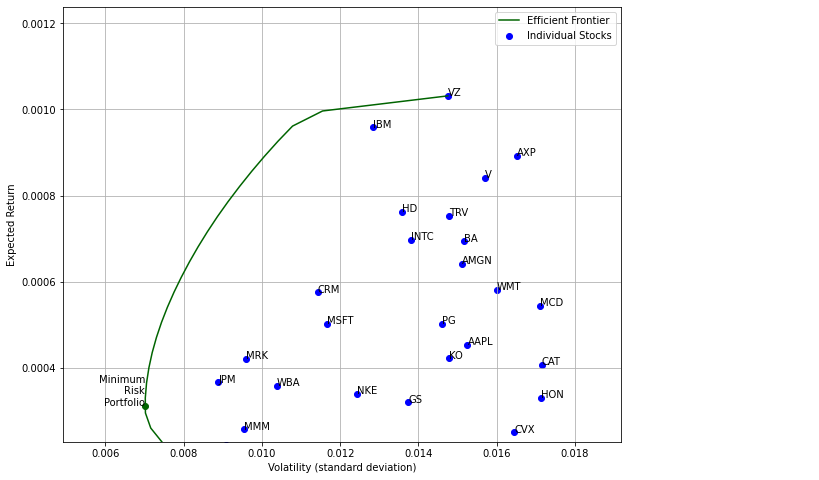

In [ ]:
#plt.figure(figsize=(10,10))

fig, ax = plt.subplots(figsize=(10,8))

# Plot volatility versus expected return for individual stocks
ax.scatter(x=std, y=delta,
           color='Blue', label='Individual Stocks')

for i, stock in enumerate(all_stocks):
    ax.annotate(stock, (std[i], delta[i]))

# Plot volatility versus expected return for minimum risk portfolio
ax.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
ax.annotate('Minimum\nRisk\nPortfolio', (minrisk_volatility, minrisk_return),
            horizontalalignment='right')

# Plot efficient frontier
ax.plot(frontier[0], frontier[1], label='Efficient Frontier', color='DarkGreen')

# Format and display the final plot
ax.axis([frontier[0].min()*0.7, frontier[0].max()*1.3, delta.min()*1.2, delta.max()*1.2])
ax.set_xlabel('Volatility (standard deviation)')
ax.set_ylabel('Expected Return')
ax.legend()
ax.grid()
plt.show()

In [ ]:
class Common_Class():
  def __init__(self, symbol, start, end, interval, capital, transcation_cost, verbose = False):
    self.all_data ={}
    self.position = {}
    self.quantity = {}

    # init initial qty of all stocks to 0
    for stock in symbol:
      self.quantity['{}'.format(stock)] = 0

    self.symbol = symbol
    self.start = start
    self.end = end
    self.interval = interval
    self.initial_capital = capital
    self.capital = capital
    self.transaction_cost = transcation_cost
    self.trades = 0
    self.verbose = verbose
    # store detail of each trade
    self.stored_data = pd.DataFrame(columns = ['trade', 'date', 'position', 'price', 'symbol', 'quantity', 'capital'])

    # prepare data
    self.prepare_data()

  def prepare_data(self):
    '''
    retrieve required columns and calculate the returns of each stock
    '''
    for i in self.symbol:
      stock_data = yf.Ticker(i)
      hist_stock = stock_data.history(start = self.start, end = self.end, interval = self.interval)
      bt_data = pd.DataFrame()
      bt_data["Close_Price"] = hist_stock["Close"]
      bt_data["High"] = hist_stock["High"]
      bt_data["Low"] = hist_stock["Low"]
      bt_data["Volume"] = hist_stock["Volume"]
      bt_data["Return"] = np.log(bt_data["Close_Price"] / bt_data["Close_Price"].shift(1))
      bt_data = bt_data.dropna()
      self.all_data['{}'.format(i)] = bt_data

  def close_graph(self, stock):
    i = str(stock)
    plt.figure(figsize=(15, 5))
    plt.plot(self.all_data[i]["Close_Price"] ,color='black', label='Price', linestyle='dashed')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.title("Close Prices of {}".format(i))
    plt.legend()
    plt.grid()
    plt.show()

  def return_date_price(self, bar, stock):
    '''
    return date and price of a stock for the specifc bar
    '''
    stock_str = str(stock)
    # get the bar-th date
    date = str(self.all_data[stock_str].index[bar])[:10]
    # get the bar-th close price
    price = self.all_data[stock_str].Close_Price.iloc[bar]

    return date, price

  def realised_balance(self, bar):
    '''
    cal the realized balance for the bar-th date which is stored in self.capital
    since capital is combination of all stock so can use any stock to get the capital
    '''
    date, price = self.return_date_price(bar, self.symbol[0])

    if self.verbose:
      print("Date :{} | Realised Balance: {:0.1f}".format(date, self.capital))

    return self.capital

  def unrealised_balance(self, bar):
    '''
    cal the unrealized capital which is determined by the postions that are currently holding at bar-th date
    '''
    ub = 0
    for stock in self.symbol:
      # retrieve the date and stock close price for the bar-th date
      date, price = self.return_date_price(bar, stock)
      # calc blance by just using stock qty * price
      ub =  ub + self.quantity['{}'.format(stock)] * price

    if self.verbose:
      print("Date :{} | Unrealised Balance: {:0.1f}".format(date,ub))

    return ub

  def total_balance(self, bar):
    '''
    unrealized plus realized
    '''
    return self.unrealised_balance(bar) + self.realised_balance(bar)
  
  def total_capital(self):
    return self.capital

  def store_results(self, trade, date, position, price, symbol, quantity, capital):
    trade_detail = pd.DataFrame({
        'trade':pd.Series(trade), 
        'date':pd.Series(date), 
        'position':pd.Series(position), 
        'price':pd.Series(price), 
        'symbol':pd.Series(symbol), 
        'quantity':pd.Series(quantity), 
        'capital':pd.Series(capital) })
    
    self.stored_data = pd.concat([self.stored_data, trade_detail])

  def performance_plots(self):
    '''
    performance based on dataframe of daily account balances
    '''
    Final_result_data = self.Final_result_data #saving time to write self everywhere
    interval = str(self.interval)
    f, ax = plt.subplots(2,3,figsize=(20,10))

    #plot 1: Close Price os stock
    plt.subplot(2, 3, 1)
    for stock in self.symbol:
      plt.plot(Final_result_data['Returns_{}'.format(stock)].cumsum(), label='{}'.format(stock), linestyle='dashed')
    plt.title("Cum Log returns of included stocks")
    plt.xlabel(interval)
    plt.legend()
    plt.grid()

    #plot 2: Histogram of dtrstegy returns
    plt.subplot(2, 3, 2)
    plt.hist(Final_result_data['capital_log_returns'], bins = 35, label='Strategy Returns', linestyle='dashed')
    plt.title("Histogram of Strategy returns")
    plt.xlabel(interval)
    plt.legend()
    plt.grid()

    #plot 3: Strategy vs Instrument
    plt.subplot(2, 3, 3)
    plt.plot(Final_result_data['Total_Stock_Returns_cum_sum'],color='red', label='Equal weighted stock Returns', linestyle='dashed')
    plt.plot(Final_result_data['capital_returns_log_cum_sum'].dropna(), label ='Strategy Returns')
    plt.title("Strategy Vs Stock Cum Return Curve")
    plt.xlabel(interval)
    plt.legend()
    plt.grid()

    #plot 4: Drawdown
    plt.subplot(2, 3, 4)
    plt.plot(Final_result_data["capital_returns_log_cum_sum"].dropna(), label='Cum log returns')
    plt.plot(Final_result_data["Cum_Max"].dropna(), label =  'Max Drawdown')
    plt.title("Drawdown")
    plt.xlabel(interval)
    plt.legend()
    plt.grid()

    #plot 5: Equity Curve
    plt.subplot(2, 3,  5)
    plt.plot(Final_result_data["capital"].dropna(), label =  'Equity $')
    plt.title("Capital Curve")
    plt.xlabel(interval)
    plt.legend()
    plt.grid()

    plt.suptitle("Performance Plots")
    f.delaxes(ax[1,2]) # to delete the last subplot

    plt.show()

  def performance(self):
    '''
    stored_data has [trade, date, position, price, symbol, quantity, capital]
    B = self.stored_data -> this will have many rows ; n(number of instruments) times more
    C = self.all_data -> will need this to aggregate the returns from all stocks
    B.index = range(B.shape[0]/len(self.symbol))

    Since the stocks are not stored in arranged manner, we need to arrange them so that we can get the entry price and exit price for each day
    stored data has many rows, we will aggregate day wise
    '''
    # creating a new datframe to store aggregated values
    df = pd.DataFrame()

    df['capital'] = self.stored_data.groupby('date').agg({'capital': 'mean'})
    #df.index = range(self.stored_data.shape[0]/len(self.symbol)) # shape[0] to get the length of rows of each stock and make an index for dataframe df

    trade_start_date = df['capital'].index[0] # If intraday, then index needs to be adjusted with time, for daily, its fine
    trade_end_date = df['capital'].index[-1] # This will work when interval is 1D

    #Also, since we have multiple stocks, we need to calculate expected returns to comapre against the strategy

    for stock in self.symbol:
      A = (self.all_data[stock][trade_start_date:trade_end_date]['Return'].tolist()) # The returns are already log
      df['Returns_{}'.format(stock)] = A

    c = df.columns #fetch all the columns of datframe
    df['Total_Stock_Returns'] = (df.loc[:,c[-len(self.symbol):]].sum(1))/len(self.symbol) # Sums up last N columns of df and divvide by number of stocks. Equal weightage
    df['Total_Stock_Returns_cum_sum'] = df['Total_Stock_Returns'].cumsum()
    df.index = range(df.shape[0])

    df['capital_after_settlement'] = df['capital'].shift(-1)

    # Since we are are utilising capital, we will calculate returns for SR based on daily capital/equity changes
    # Remember, you can change the returns on investment based on the capital you trade

    df['capital_regular_returns'] = (df['capital_after_settlement']/df['capital'] - 1)
    df['capital_log_returns'] = np.log(df['capital_after_settlement']/df['capital'])
    df["capital_returns_log_cum_sum"] = df["capital_log_returns"].cumsum()

    # for drawdown calculation
    df["Cum_Max"] = df["capital_returns_log_cum_sum"].cummax()
    df["drawdown"] = df["Cum_Max"] - df["capital_returns_log_cum_sum"]

    df.drop(df.index[df['capital_log_returns'] == 0.0], inplace=True) #Dropping the last column, as I already got the values through shift(1)
    df = df.dropna()

    #storing the results in Final_result data
    Final_result_data = df

    print("=" *50)
    print("Performance Metrics")

    #Total Balance
    print("The total capital at end of strategy: {:0.1f}".format(self.capital))

    #Annual gross expected returns
    daily_log_mean_ret = Final_result_data['capital_log_returns'].mean()
    annual_log_ret = 252 * daily_log_mean_ret
    annual_regular_return = (np.exp(annual_log_ret) -1)*100
    print("The annual regular returns: {:0.2f} %".format(annual_regular_return))

    #Annual std deviation
    daily_regular_std = (np.exp(Final_result_data['capital_log_returns'])-1).std()
    annual_regular_std =  daily_regular_std * (252 **0.5) *100
    print("The annual regular std deviation: {:0.2f} %".format(annual_regular_std))

    #Annual Sharpe Ratio
    SR = annual_regular_return / annual_regular_std
    print("The annual Sharpe Ratio: {:0.2f}".format(SR))

    #The strategy returns on investment in percent
    returns = (self.capital - self.initial_capital) /self.initial_capital *100
    print("The returns on investment from {} to {} by this strategy is {:0.1f} %".format(self.start, self.end, returns))

    #Calculate Drawdown
    #Final_result_data[["capital_returns_log_cum_sum", "Cum_Max"]].dropna().plot(figsize =(15,6), title = "Drawdown Plot")

    Drawdown = Final_result_data["drawdown"].max()*100
    print("The maximum drawdown: {:.2f} %".format(Drawdown))

    zero_periods = Final_result_data[Final_result_data['drawdown'] == 0]
    delta_values = (zero_periods.index[1:] - zero_periods.index[:-1])
    print("The maximum drawdown period: {:.2f} days".format(delta_values.max()))

    #Annual Sortino Ratio
    only_neg_log_returns = Final_result_data[Final_result_data['capital_log_returns']<0]['capital_log_returns']
    only_neg_regular_returns = np.exp(only_neg_log_returns)-1

    daily_std_dev_for_sortino = only_neg_regular_returns.std()
    annual_std_dev_for_sortino = daily_std_dev_for_sortino * (252 ** 0.5)*100

    sortino = annual_regular_return / annual_std_dev_for_sortino
    print("The annual Sortino Ratio: {:0.2f}".format(sortino))

    #Total trades
    print("The total trades taken by the strategy: {}".format(self.trades))

    print("=" *50)

    self.Final_result_data = Final_result_data


  def buy_order(self,bar,stock,quantity=None, dollar =None ):
    date, price = self.return_date_price(bar, stock)

    if quantity == None:
      quantity = int(dollar/price)

    self.capital = self.capital - ((quantity * price)*(1 + self.transaction_cost)) # capital will be lost in buying
    self.quantity['{}'.format(stock)] = self.quantity['{}'.format(stock)] + quantity
    self.trades = self.trades + 1
    self.position['{}'.format(stock)] += 1
    # to store the total balance due to all the stocks at the end of the day, so that I get 1 value at the EOD
    tb = self.total_balance(bar)
    #self.quantity['{}'.format(stock)]*price + self.capital # this is just for one stock, however, I need for all the stocks
    self.store_results(self.trades, date, self.position['{}'.format(stock)], price, stock, quantity, tb)

    if self.verbose:
      print("Bought {} shares of {} at {:0.1f} per share worth {:0.1f} $".format(quantity,stock, price, quantity * price))
      print('Total quantity for {} is {}'.format(stock,self.quantity['{}'.format(stock)]))


  def sell_order(self,bar,stock, quantity=None, dollar=None ):
    date, price = self.return_date_price(bar, stock)

    if quantity == None:
      quantity = int(dollar/price)

    self.capital = self.capital + ((quantity * price)*(1 - self.transaction_cost)) # capital will be added after selling
    self.quantity['{}'.format(stock)] = self.quantity['{}'.format(stock)] - quantity
    self.trades = self.trades + 1
    self.position['{}'.format(stock)] -= 1
    # to store the total balance due to all the stocks at the end of the day, so that I get 1 value at the EOD
    tb = self.total_balance(bar)
    self.store_results(self.trades, date, self.position['{}'.format(stock)], price, stock, quantity, tb)

    if self.verbose:
      print("Sold {} shares of {} at {:0.1f} per share worth {:0.1f} $".format(quantity,stock, price, quantity * price))
      print('Total quantity for {} is {}'.format(stock,self.quantity['{}'.format(stock)]))

  def last_trade(self, bar):# this needs to be check for all open positions of all stocks

    for stock in self.symbol:
      date, price = self.return_date_price(bar, stock)
      last_quantity = self.quantity['{}'.format(stock)]
      self.capital = self.capital + self.stock_quantity[stock] * price
      self.quantity['{}'.format(stock)] = 0 # as no more quantity now. all will be settled
      self.trades = self.trades +1

      if self.position['{}'.format(stock)] == -1: # if closing out a short position
        last_quantity = - last_quantity # to keep a pos number in records. Note, self.quantity is always maintianing a +/- sign.
        self.position['{}'.format(stock)] = 1 # to record we are buying to close out
      else:
        last_quantity =  last_quantity # to keep a positve nymber in records
        self.position['{}'.format(stock)] = -1 # to record we are selling to close out

      #self.position = 0
      tb = self.total_balance(bar)
      self.store_results(self.trades, date, self.position['{}'.format(stock)], price, stock, last_quantity, tb)

      if self.verbose:
        print("Closed open trades for {} shares of {} at {:0.1f} per share worth {:0.1f} $".format(last_quantity,stock, price, last_quantity * price))


In [ ]:
class Portfolio(Common_Class):

  def go_long(self, bar, stock, quantity = None, dollar = None):
    # clear prev short pos first
    self.close_position(bar, stock)
    
    if quantity:
      self.buy_order (bar, stock, quantity = quantity) # to create new fresh order
    elif dollar:
      if dollar == 'all':
        dollar = self.capital

      self.buy_order(bar, stock, dollar = dollar)
    
  def close_position(self, bar, stock):
    self.position['{}'.format(stock)] = 0

    if self.position['{}'.format(stock)] == -1: # close short
      self.buy_order(bar,stock, quantity = - self.quantity['{}'.format(stock)])
    elif self.position['{}'.format(stock)] == 1: # close long
      self.sell_order(bar,stock, quantity = self.quantity['{}'.format(stock)])

  def run_portfolio(self, LookbackWindow, STWindow, LTWindow, stock_weights):
    self.capital = self.initial_capital

    # preparing data with required indicators
    for stock in self.symbol:
      self.quantity['{}'.format(stock)] = 0
      self.position['{}'.format(stock)] = 0

    # from the available data bar to the last data bar
    bar = 0
    for stock in self.symbol:
      date, price = self.return_date_price(bar, stock)
      self.go_long(bar, stock, dollar = self.capital/stock_weights[stock])

      #-----Storing all the values for calculating Sharpe-----
      store_quantity = abs(self.quantity['{}'.format(stock)])
      tb = self.total_balance(bar)
      self.store_results(0, date, self.position['{}'.format(stock)], price, stock, store_quantity, tb)

### Portfolio Testing

Performance Metrics
The total capital at end of strategy: 693489.3
The annual regular returns: 9.57 %
The annual regular std deviation: 12.60 %
The annual Sharpe Ratio: 0.76
The returns on investment from 2016-01-01 to 2019-12-31 by this strategy is 38.7 %
The maximum drawdown: 15.45 %
The maximum drawdown period: 193.00 days
The annual Sortino Ratio: 1.01
The total trades taken by the strategy: 95


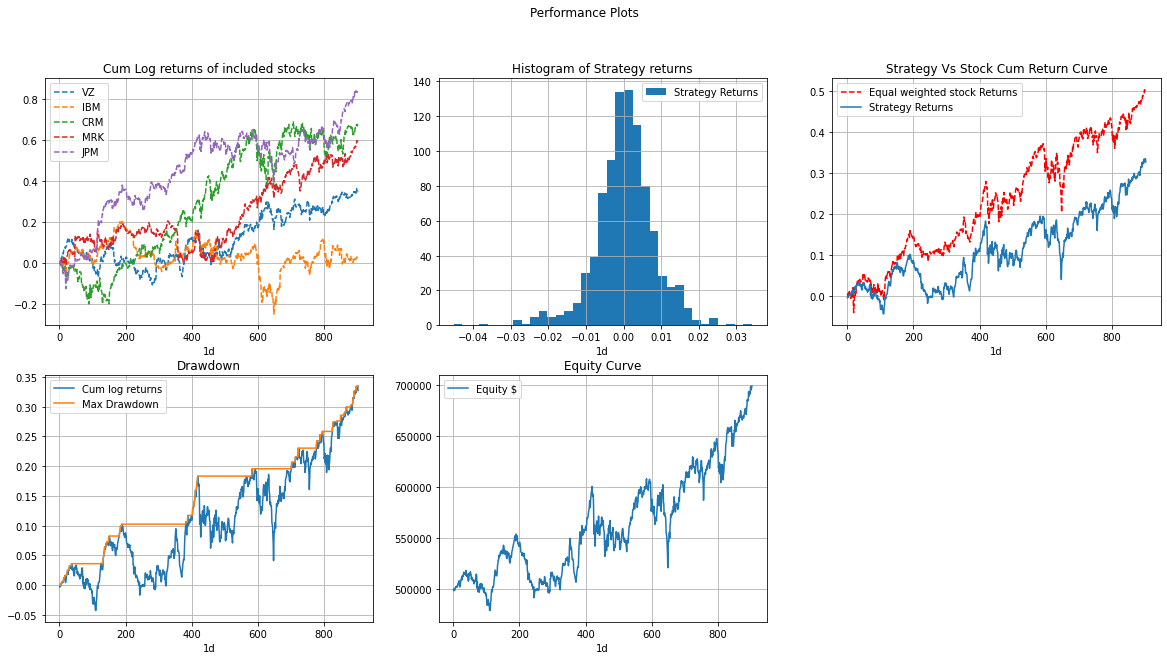

In [ ]:
data = {}

if __name__ == '__main__':
      
  # instantiate an instance of the main class Backtester
  output = Portfolio(tickers, START, END, INTERVAL, INITIAL_CAPITAL, 0.00, False)
  output.run_strategy(LookbackWindow=optimal_parameters["Lookback Window"], STWindow=optimal_parameters["Short Term Window"], LTWindow=optimal_parameters["Long Term Window"])

  #get the performance
  output.performance()

  output.performance_plots()

#Benchmark Metrics


We use the DJI as the benchmark for comparing our performance of our strategy.

In [ ]:
stock_data = yf.Ticker('STI')
hist_stock = stock_data.history(start = START, end = END, interval = INTERVAL)

investment_returns = 100*(((hist_stock["Close"][-1] - hist_stock["Close"][0])/hist_stock["Close"][0]))

bt_data = pd.DataFrame()
bt_data["Close_Price"] = hist_stock["Close"]
bt_data['Stock_Returns'] = np.log(bt_data["Close_Price"] / bt_data["Close_Price"].shift(1)) 

# returns
returns = np.exp(bt_data["Stock_Returns"].sum())-1
print(f'Stock returns: {returns}')

# risk
stock_std_dev = (bt_data["Stock_Returns"].std()) * 100
stock_std_dev = round(stock_std_dev, 2)
print(f'Stock std dev: {stock_std_dev}')

# Sharpe Ratio
avg_returns = bt_data["Stock_Returns"].mean()
std = bt_data["Stock_Returns"].std()
daily_SR = avg_returns / std
annual_SR = daily_SR * (252 ** 0.5)
annual_SR = round(annual_SR, 2)
print(f'Annual SR: {annual_SR}')

# drawdown
bt_data["Gross_Cum_Returns"] = bt_data["Stock_Returns"].cumsum().apply(np.exp) 
bt_data["Cum_Max"] = bt_data["Gross_Cum_Returns"].cummax()
drawdown = bt_data["Cum_Max"] - bt_data["Gross_Cum_Returns"] # it gives the difference between orange and blue
bt_data["drawdown"] = drawdown
drawdown_max = round(bt_data["drawdown"].max(),2)
print(f'Max drawdown: {drawdown_max}')

investment_returns = 100*(((hist_stock["Close"][-1] - hist_stock["Close"][0])/hist_stock["Close"][0]))
print(f'Investment returns: {investment_returns}')
print(f'Returns: {returns}')

Stock returns: 0.6597026715732845
Stock std dev: 0.82
Annual SR: 0.98
Max drawdown: 0.29
Investment returns: 65.97026715732808
Returns: 0.6597026715732845
